# 火星全球地质图层概览 (Geologic Map Overview)

本 Notebook 目标：

- 载入官方发布的火星全球地质图层shp文件。
- 浏览主要地质单元属性字段，并进行基础统计。
- 绘制概览图。

In [20]:
import geopandas as gpd
import matplotlib.pyplot as plt

In [21]:
shp_path = "../resources/SIM3292_MarsGlobalGeologicGIS_20M/SIM3292_Shapefiles/SIM3292_Global_Geology.shp"
gdf = gpd.read_file(shp_path)
gdf.head()

,OBJECTID,Shape_Leng,Shape_Area,Unit,UnitDesc,SphArea_km,geometry
0,1,1.004969e+07,4.450246e+11,lApc,Late Amazonian polar cap unit,103642.00,"POLYGON ((-56.63683 -84.72985, -56.63235 -84.7..."
1,2,1.357599e+06,3.214948e+10,Hpe,Hesperian polar edifice unit,15347.10,"POLYGON ((21.93653 -80.13496, 21.96328 -80.135..."
2,3,2.575993e+06,7.040982e+10,Hp,Hesperian polar unit,33723.60,"POLYGON ((-36.84076 -79.79726, -36.83184 -79.7..."
3,4,6.740798e+05,1.191163e+10,Hpe,Hesperian polar edifice unit,6217.34,"POLYGON ((-20.70137 -77.96855, -20.68342 -77.9..."
4,5,4.154933e+06,1.652814e+11,Hp,Hesperian polar unit,83363.70,"POLYGON ((94.18004 -77.1473, 94.18898 -77.1477..."


In [22]:
print("数据行数:", len(gdf))
print("字段名:", gdf.columns.tolist())
print("几何类型:", gdf.geom_type.unique())
print("坐标参考系:", gdf.crs)

数据行数: 1311
字段名: ['OBJECTID', 'Shape_Leng', 'Shape_Area', 'Unit', 'UnitDesc', 'SphArea_km', 'geometry']
几何类型: ['Polygon']
坐标参考系: GEOGCS["GCS_Mars_2000_Sphere",DATUM["Mars_2000_(Sphere)",SPHEROID["Mars_2000_Sphere_IAU_IAG",3396190,0],AUTHORITY["ESRI","106971"]],PRIMEM["Reference_Meridian",0],UNIT["Degree",0.0174532925199433],AXIS["Longitude",EAST],AXIS["Latitude",NORTH]]


In [23]:
# 列出 Unit 字段的所有唯一类型及其描述
unit_types = sorted(gdf['Unit'].unique())
print('Unit 类型总数:', len(unit_types))

print('\nUnit 类型及其描述：')
# 创建唯一的单元-描述对应关系
unit_desc_map = gdf[['Unit', 'UnitDesc']].drop_duplicates().set_index('Unit')['UnitDesc'].to_dict()

for u in unit_types:
    desc = unit_desc_map.get(u, 'No description')
    print(f'{u}: {desc}')

Unit 类型总数: 44

Unit 类型及其描述：
AHi: Amazonian and Hesperian impact unit
AHtu: Amazonian and Hesperian transition undivided unit
AHv: Amazonian and Hesperian volcanic
ANa: Amazonian and Noachian apron unit
Aa: Amazonian apron unit
Ap: Amazonian polar unit
Apu: Amazonian polar undivided unit
Av: Amazonian volcanic unit
Ave: Amazonian volcanic edifice
HNb: Hesperian and Noachian basin unit
HNhu: Hesperian and Noachian highland undivided unit
HNt: Hesperian and Noachian transition unit
Hp: Hesperian polar unit
Hpe: Hesperian polar edifice unit
Hpu: Hesperian polar undivided unit
Ht: Hesperian transition unit
Hto: Hesperian transition outflow unit
Htu: Hesperian transition undivided unit
Hve: Hesperian volcanic edifice unit
Nhe: Noachian highland edifice unit
Nhu: Noachian highland undivided unit
Nve: Noachian volcanic edifice unit
eAb: Early Amazonian basin unit
eHb: Early Hesperian basin unit
eHh: Early Hesperian highland unit
eHt: Early Hesperian transition unit
eHv: Early Hesperian volcani

In [18]:
# 简单统计
print("总记录数:", len(gdf))
print("最大面积(km²):", gdf['SphArea_km'].max())
print("最小面积(km²):", gdf['SphArea_km'].min())
print("平均面积(km²):", gdf['SphArea_km'].mean())
print("面积中位数(km²):", gdf['SphArea_km'].median())
print("面积标准差(km²):", gdf['SphArea_km'].std())

总记录数: 1311
最大面积(km²): 15799800.0
最小面积(km²): 745.231
平均面积(km²): 110558.09301372996
面积中位数(km²): 18897.6
面积标准差(km²): 684540.0008702092


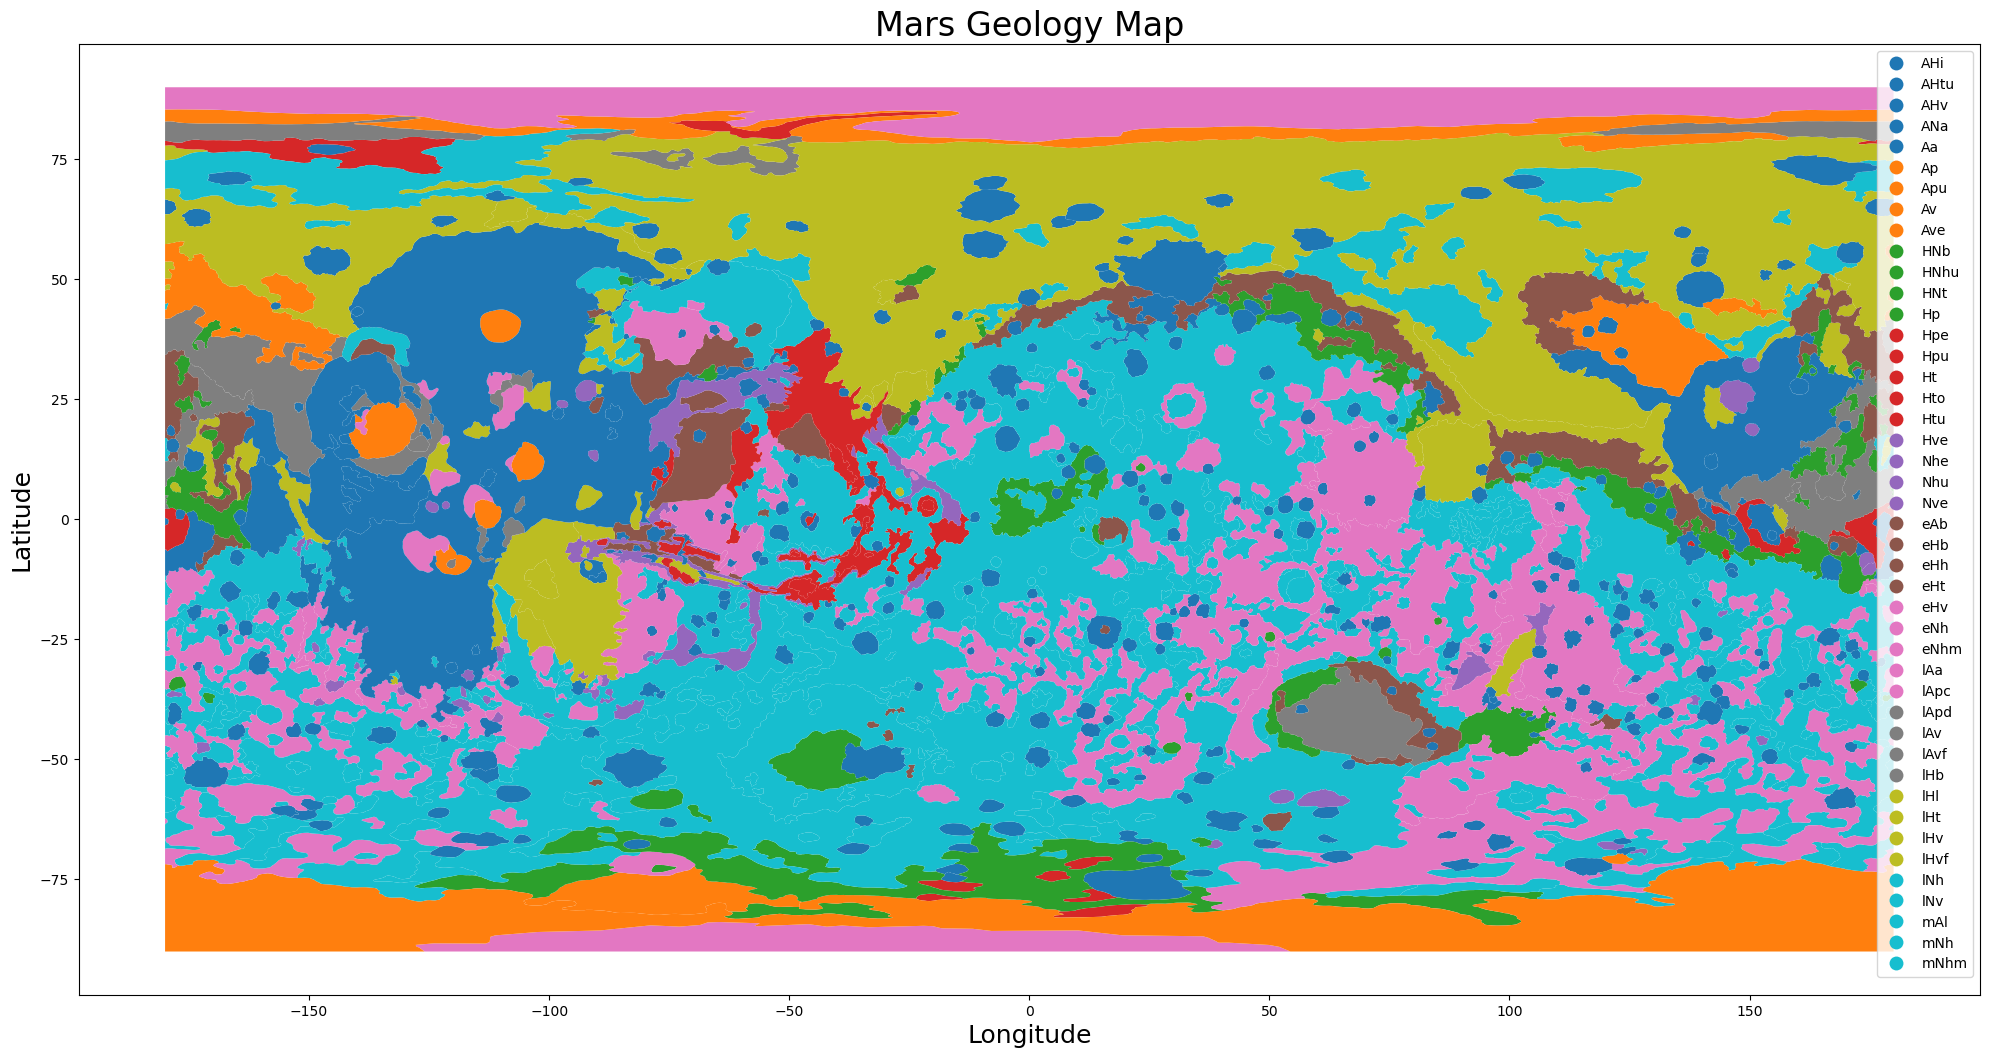

In [19]:
# 使用默认配色方案绘制地质图
fig, ax = plt.subplots(figsize=(20, 15))
gdf.plot(column='Unit', categorical=True, legend=True, ax=ax)
ax.set_title("Mars Geology Map", fontsize=24)
ax.set_xlabel("Longitude", fontsize=18)
ax.set_ylabel("Latitude", fontsize=18)
plt.tight_layout()
plt.savefig("../output/images/mars_geology_map.png", dpi=600)
plt.show()